In [16]:
from pyuvdata import UVCal
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

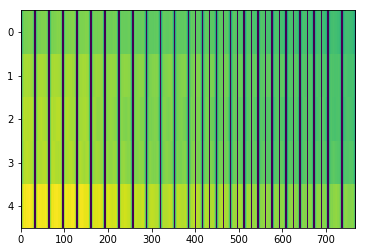

In [17]:
#Type in list of specified antenna names/numbers, polarization, filename. Defaults set to None.

#List of antenna names. Cannot be provided if antenna nums is also provided.
antenna_namelist = None

#List of antenna numbers. Cannot be provided if antenna names is also provided.
antenna_numlist = [0,1,2,3,4]

#Array of polarizations.
polarization_array = [-6]

#Fill in with filename.
filename = '1163765528.calfits'

#Displays waterfall plot of UV Gains corresponding to specified parameters.
plot_gains(antenna_namelist, antenna_numlist, polarization_array, filename)

In [18]:
#Displays waterfall plot of UV Gains of specified antenna names/numbers and polarizations.
def plot_gains(antenna_name, antenna_number, polarization_array, filename):
    cal = UVCal()
    cal.read_calfits(filename)
    if antenna_name == None:
        antenna_list = None
    else:
        antenna_list = [[] for x in range(0,len(antenna_name))]
        for i in antenna_name:
            antenna_list[antenna_name.index(i)].append(i)
    if antenna_number == None:
        antenna_num = None
    else:
        antenna_num = antenna_number
    newcal = cal.select(antenna_names = antenna_list, antenna_nums = antenna_num, jones = polarization_array, inplace = False)
    plt.imshow(np.abs(np.abs(newcal.gain_array[:,0,:,0,0])), aspect='auto')
    plt.show()